# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

In [2]:
data = pd.read_csv('pima-indians-diabetes+(3).csv')

# 2. Print 10 samples from the dataset

In [3]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
90,1,80,55,0,0,19.1,0.258,21,0
115,4,146,92,0,0,31.2,0.539,61,1
495,6,166,74,0,0,26.6,0.304,66,0
619,0,119,0,0,0,32.4,0.141,24,1
478,8,126,74,38,75,25.9,0.162,39,0
620,2,112,86,42,160,38.4,0.246,28,0
713,0,134,58,20,291,26.4,0.352,21,0
87,2,100,68,25,71,38.5,0.324,26,0
88,15,136,70,32,110,37.1,0.153,43,1
758,1,106,76,0,0,37.5,0.197,26,0


# 3. Print the datatypes of each column and the shape of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [7]:
data['Preg'] =  data['Preg'].replace(0, data.Preg.median())
data['Plas'] =  data['Plas'].replace(0, data.Plas.median())
data['Pres'] =  data['Pres'].replace(0, data.Pres.median())
data['skin'] =  data['skin'].replace(0, data.skin.median())
data['test'] =  data['test'].replace(0, data.test.median())
data['mass'] =  data['mass'].replace(0, data.mass.median())
data['pedi'] =  data['pedi'].replace(0, data.pedi.median())
data['age'] = data['age'].replace(0, data.age.median())
#data['class'] =  data['class'].replace(0, data.class.median())

In [8]:
data['class'].median()

0.0

In [9]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
16,3,118,84,47,230.0,45.8,0.551,31,1
356,1,125,50,40,167.0,33.3,0.962,28,1
435,3,141,72,23,30.5,42.4,0.205,29,1
21,8,99,84,23,30.5,35.4,0.388,50,0
584,8,124,76,24,600.0,28.7,0.687,52,1
501,3,84,72,32,30.5,37.2,0.267,28,0
250,9,106,52,23,30.5,31.2,0.380,42,0
33,6,92,92,23,30.5,19.9,0.188,28,0
122,2,107,74,30,100.0,33.6,0.404,23,0
540,8,100,74,40,215.0,39.4,0.661,43,1


# 5. Print the descriptive statistics of each & every column using describe() function

In [10]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [11]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

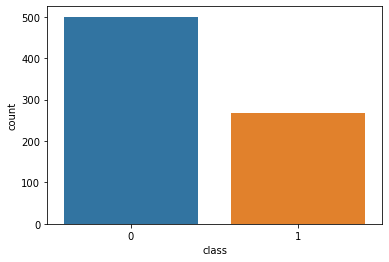

In [12]:
sns.countplot(data['class'],label="Count")

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

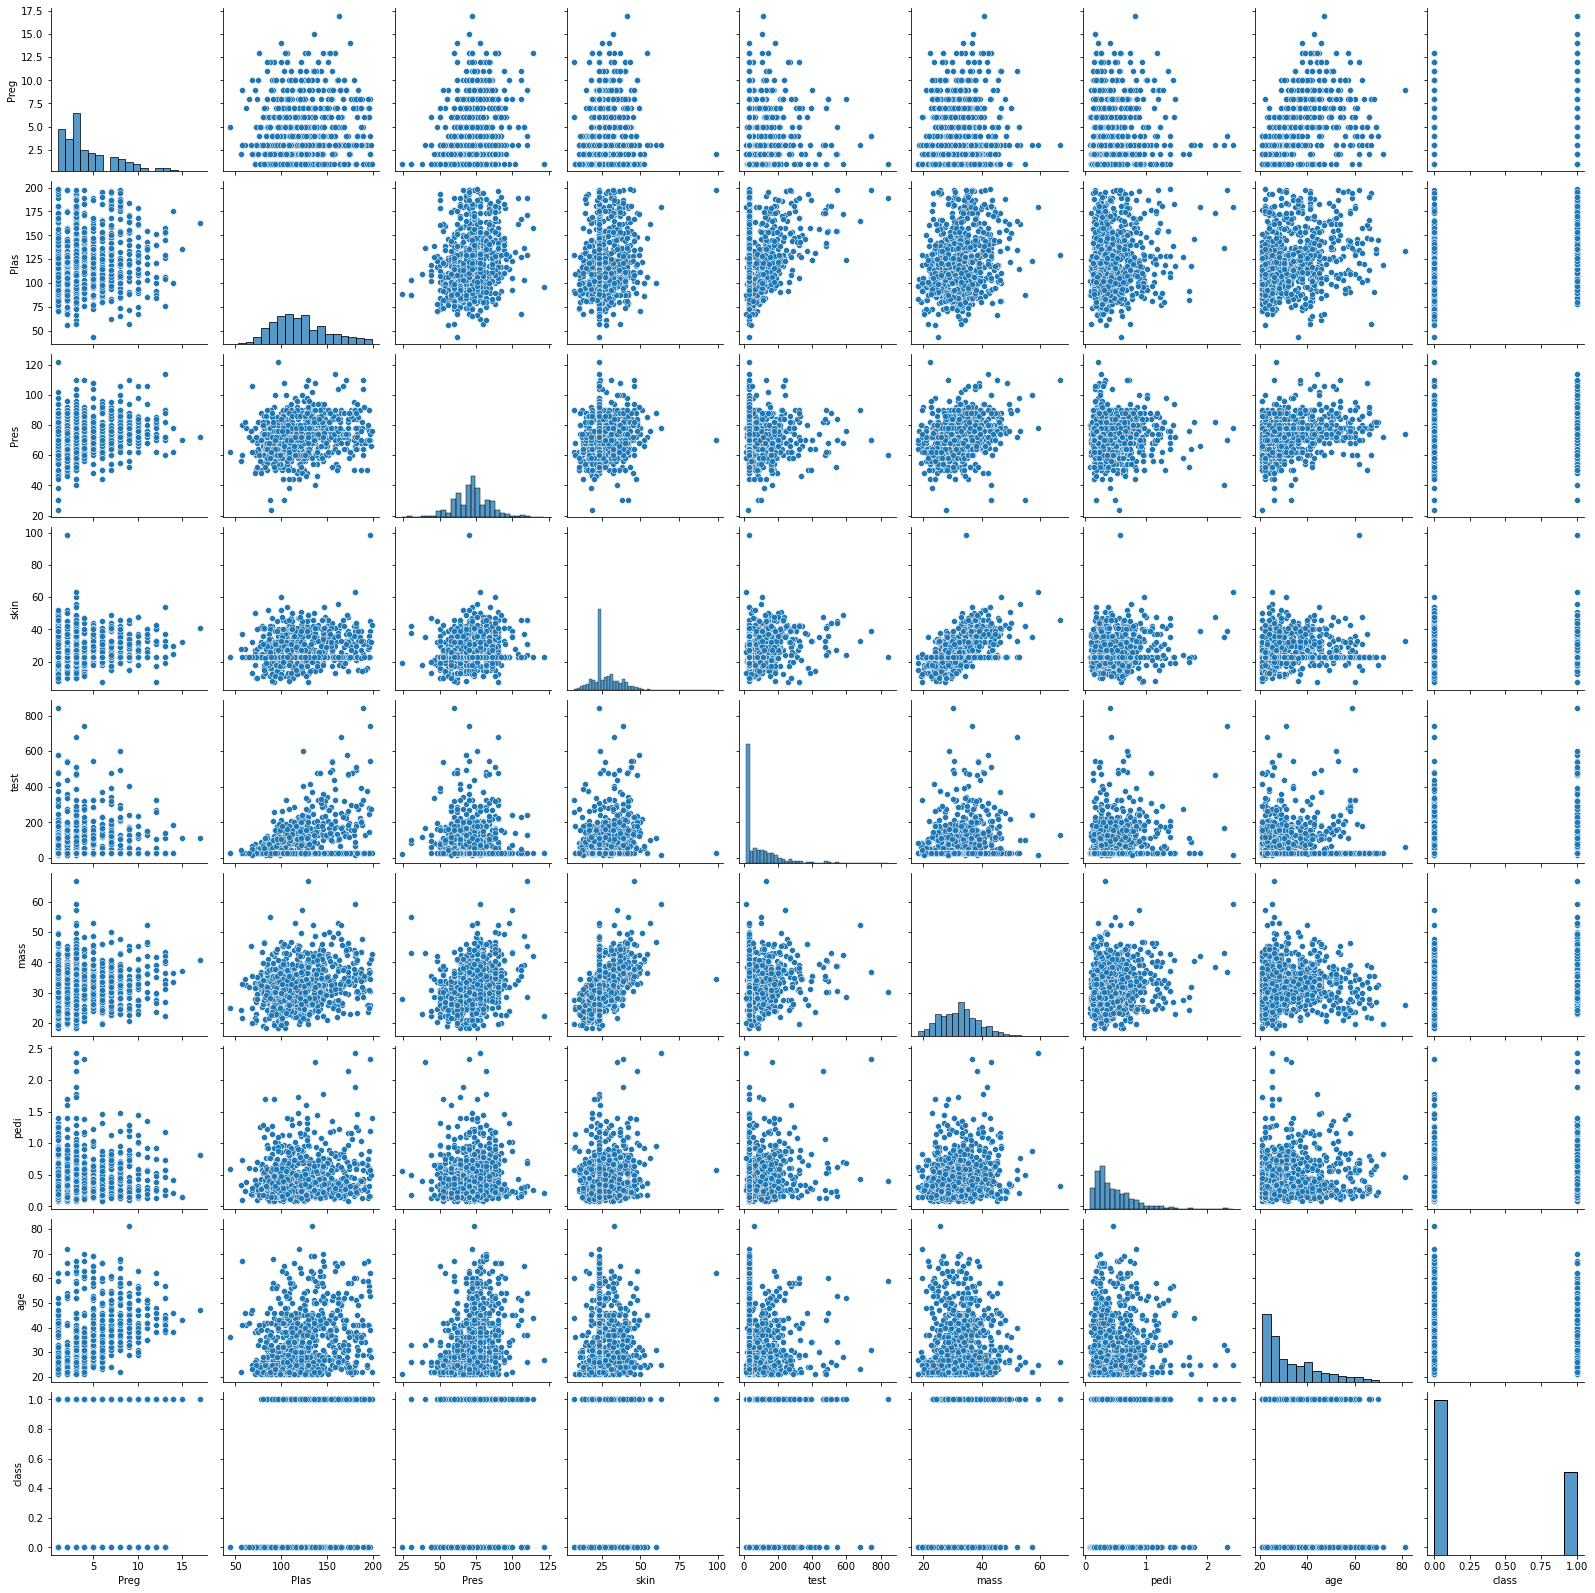

In [13]:
sns.pairplot(data)

<AxesSubplot:>

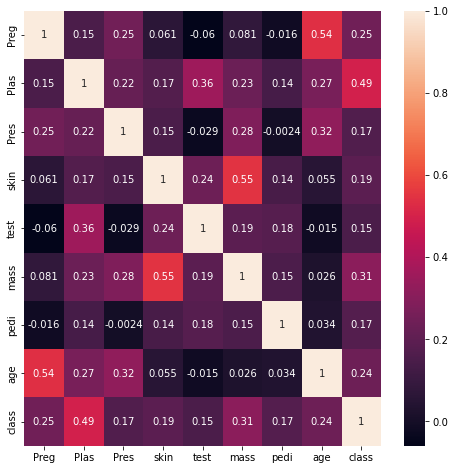

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

Check for correlation between variables whose values are >0.8

In [15]:
data.corr()>0.8

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,True,False,False,False,False,False,False,False,False
Plas,False,True,False,False,False,False,False,False,False
Pres,False,False,True,False,False,False,False,False,False
skin,False,False,False,True,False,False,False,False,False
test,False,False,False,False,True,False,False,False,False
mass,False,False,False,False,False,True,False,False,False
pedi,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,True,False
class,False,False,False,False,False,False,False,False,True


<AxesSubplot:>

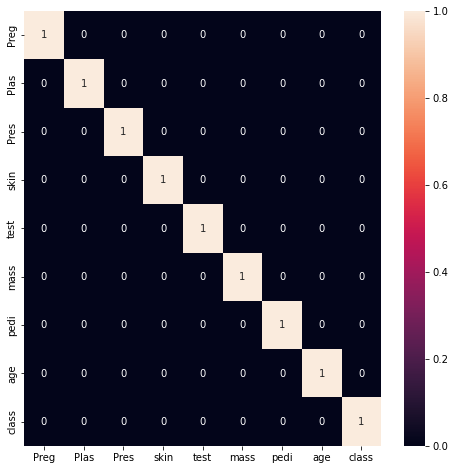

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr()>0.8,annot=True)

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [19]:
X = data.drop('class', axis=1)
y = data['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )

In [24]:
dt_model.fit(X_train, y_train )

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5)

# 10. Print the accuracy of the model & print the confusion matrix

In [25]:
dt_model.score(X_train, y_train)

0.8230912476722533

In [26]:
dt_model.score(X_test, y_test)

0.7142857142857143

# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, y_train)

In [28]:
rfcl.score(X_train, y_train)

0.962756052141527

In [29]:
rfcl.score(X_test, y_test)

0.7489177489177489

# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [31]:
abcl.score(X_train, y_train)

0.8621973929236499

In [32]:
abcl.score(X_test, y_test)

0.7272727272727273

# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [33]:
from sklearn.ensemble import BaggingClassifier
credit_labels = data.pop("class")
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(data, credit_labels)
print(bgcl.oob_score_)

0.765625


# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [35]:
gbcl.score(X_train, y_train)

0.9795158286778398

In [36]:
gbcl.score(X_test, y_test)

0.7835497835497836